In [2]:
import numpy as np
import pandas as pd 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(style='whitegrid') #palette="pastel" 

import warnings
warnings.filterwarnings("ignore")

##### Part I. MANOVA and catplot
###### seaborn gallary : https://seaborn.pydata.org/examples/pointplot_anova.html

In [3]:
df = sns.load_dataset('exercise')
print(df.shape)
df.head()

(90, 6)


,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest


In [4]:
print('> diet = ', df['diet'].unique())
print('> pulse = ', df['pulse'].unique())
print('> time = ', df['time'].unique())
print('> kind = ', df['kind'].unique())

> diet =  [low fat, no fat]
Categories (2, object): [low fat, no fat]
> pulse =  [ 85  88  90  92  93  97  94  80  82  83  91  84  87  95  99  96 100  86
 103 104  89 109 101  98 102 110 112 105 132 120 116 126 143 140 124 135
 130 111 150]
> time =  [1 min, 15 min, 30 min]
Categories (3, object): [1 min, 15 min, 30 min]
> kind =  [rest, walking, running]
Categories (3, object): [rest, walking, running]


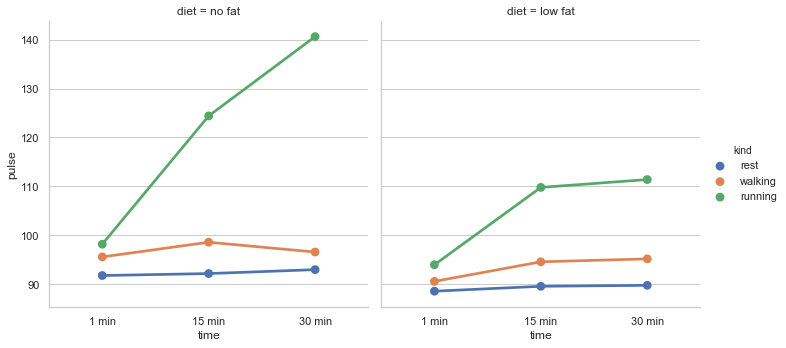

In [5]:
#### catplot의 장점 --> barplot, lineplot등과는 달리 "col=" 옵션을 사용할 수 있다. 
sns.catplot(data=df, x='time', y='pulse', hue='kind', col='diet', kind='point', ci=0)

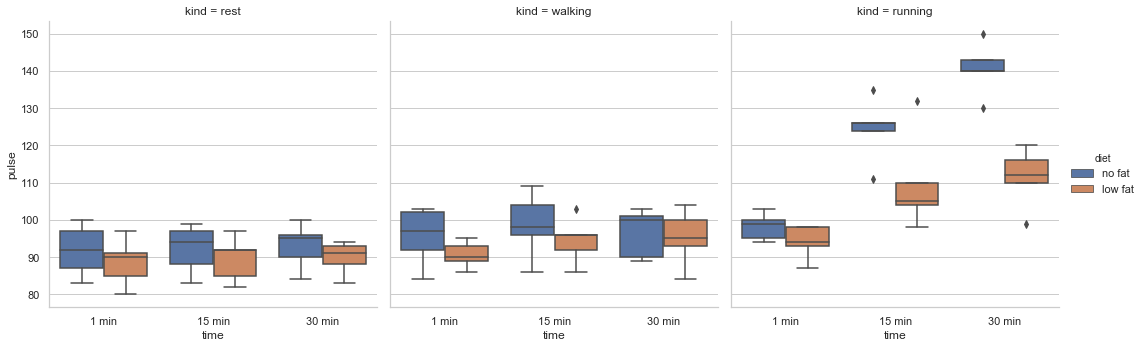

In [6]:
sns.catplot(data=df, x='time', y='pulse', hue='diet', col='kind', kind='box')

In [7]:
#### 분산과 표준편차 구하기 
print(df.var())
print(df.std())
print('------------------------------------------------------------------')
rest = df.query("kind == 'rest'")
print(rest.var())
print(rest.std())
print('------------------------------------------------------------------')
walking = df.query("kind == 'walking'")
print(walking.var())
print(walking.std())
print('------------------------------------------------------------------')
running = df.query("kind == 'running'")
print(running.var())
print(running.std())

Unnamed: 0    682.500000
id             75.758427
pulse         220.774157
dtype: float64
Unnamed: 0    26.124701
id             8.703932
pulse         14.858471
dtype: float64
------------------------------------------------------------------
Unnamed: 0    77.500000
id             8.534483
pulse         34.005747
dtype: float64
Unnamed: 0    8.803408
id            2.921384
pulse         5.831445
dtype: float64
------------------------------------------------------------------
Unnamed: 0    77.500000
id             8.534483
pulse         45.958621
dtype: float64
Unnamed: 0    8.803408
id            2.921384
pulse         6.779279
dtype: float64
------------------------------------------------------------------
Unnamed: 0     77.500000
id              8.534483
pulse         310.478161
dtype: float64
Unnamed: 0     8.803408
id             2.921384
pulse         17.620390
dtype: float64


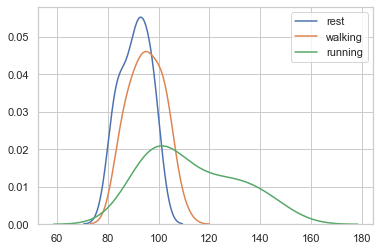

In [8]:
#### 분산의 분포 곡선 그리기 
sns.kdeplot(data= rest['pulse'], label='rest')
sns.kdeplot(data= walking['pulse'], label='walking')
sns.kdeplot(data= running['pulse'], label='running')

##### Part II. PairGrid
###### https://seaborn.pydata.org/examples/paired_pointplots.html

In [12]:
titanic = sns.load_dataset('titanic')
print(titanic.shape)
titanic.head()

(891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


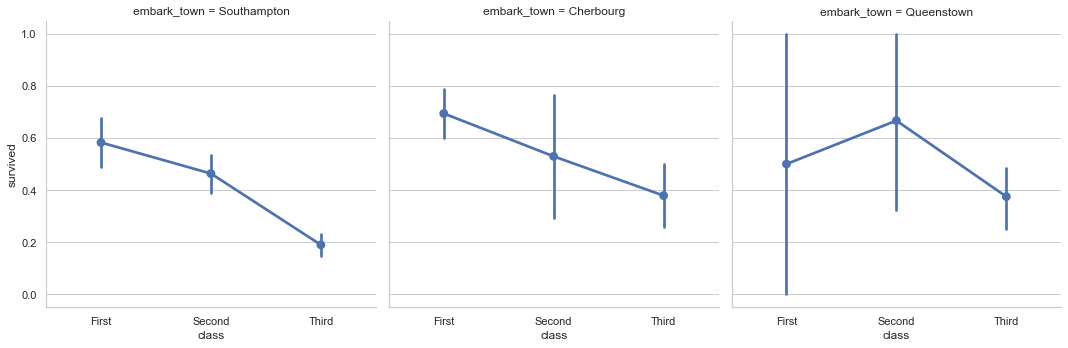

In [16]:
#### catplot + col 옵션으로는 아래와 같이 x축은 동일한 차트들을 여러개 그리지만 ... 
sns.catplot(data=titanic, x='class', y='survived', col='embark_town', kind='point')

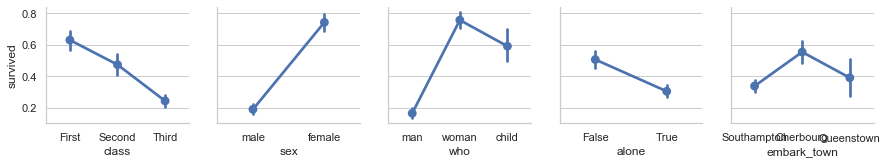

In [28]:
#### PairGrid는 category 변수들을 좀더 자유롭게 지정 가능하다. 
#### x_vars = [] 에 col에 해당하는 카테고리 변수들을 지정한다. 
g= sns.PairGrid(data=titanic, y_vars = 'survived', 
                              x_vars = ['class', 'sex', 'who', 'alone', 'embark_town'])
g.map(sns.pointplot)

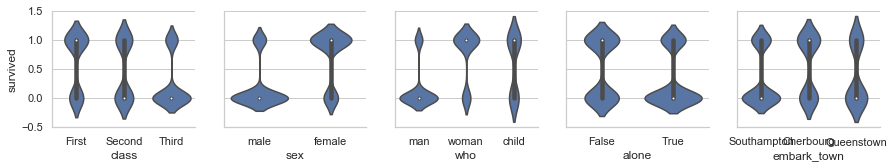

In [39]:
g2= sns.PairGrid(data=titanic, y_vars = 'survived', x_vars = ['class', 'sex', 'who', 'alone', 'embark_town'])
g2.map(sns.violinplot)

In [40]:
#### PairGrid는 pairplot을 사용자 정의 방식으로 그릴 수 있다. 
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


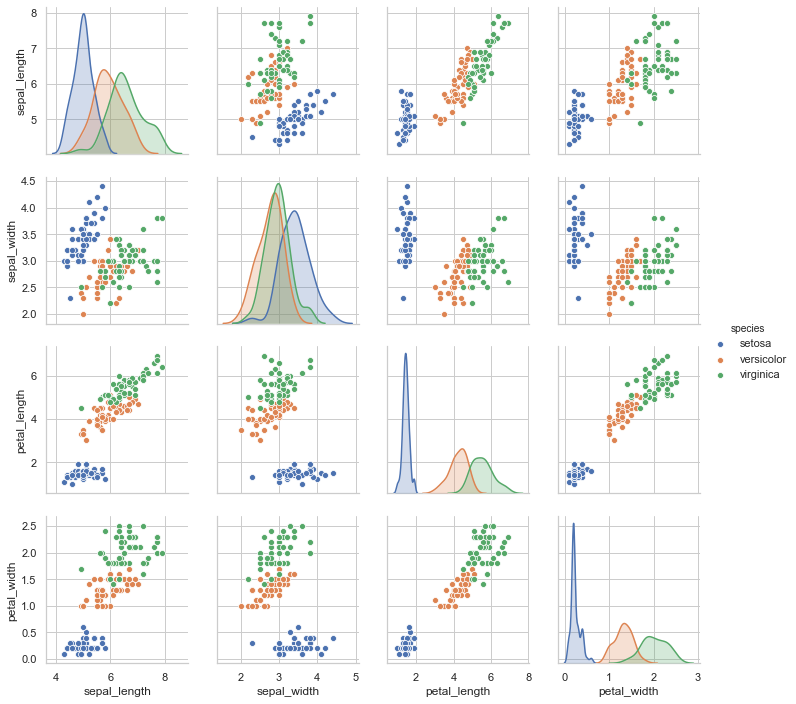

In [42]:
#### pairplot은 matrix의 위쪽 & 아래쪽이 같다. 
sns.pairplot(data=iris, hue='species')

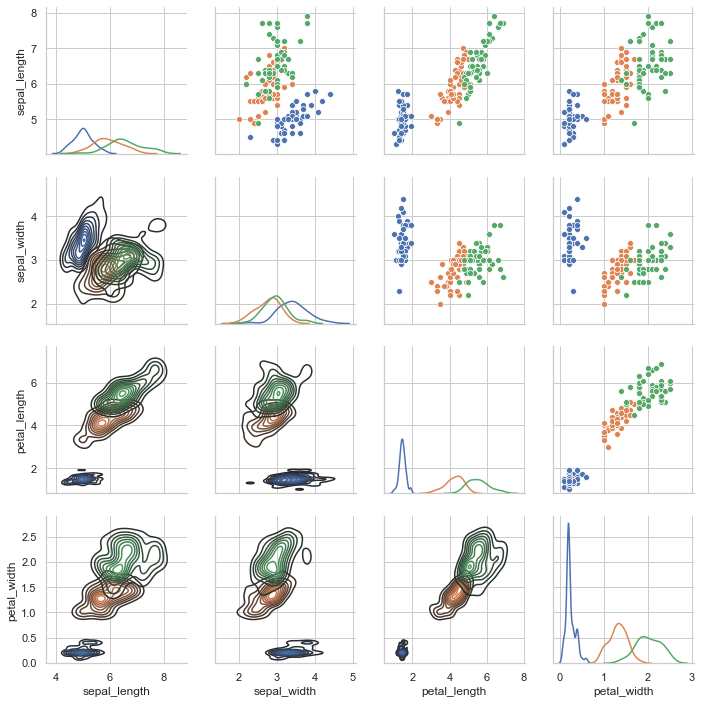

In [44]:
#### PairGrid에서는 매트릭스의 위/아래/중간을 사용자가 지정한다. 
g = sns.PairGrid(data=iris, hue='species')
g.map_upper(sns.scatterplot)   ## 상단은 산점도로 
g.map_lower(sns.kdeplot)       ## 하단은 밀도함수로 --> 변량이 2개이므로 등고선 차트 생성
g.map_diag(sns.kdeplot)        ## 가운데는 밀도함수 --> 변량이 1개이므로 분포곡선 생성

##### Part III. relplot
###### https://seaborn.pydata.org/examples/faceted_lineplot.html

In [51]:
dots = sns.load_dataset('dots')
print(dots.shape)
print(dots.info())
dots.head()

(848, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848 entries, 0 to 847
Data columns (total 5 columns):
align          848 non-null object
choice         848 non-null object
time           848 non-null int64
coherence      848 non-null float64
firing_rate    848 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 33.2+ KB
None


,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487


In [50]:
print(dots['align'].unique())
print(dots['choice'].unique())

['dots' 'sacc']
['T1' 'T2']


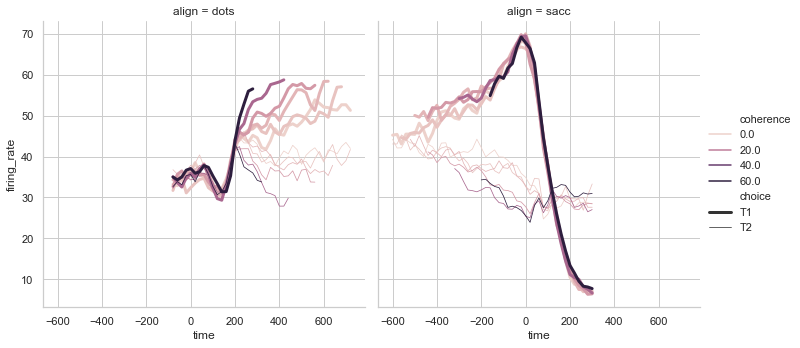

In [55]:
sns.relplot(data=dots, x='time', y='firing_rate', 
            hue='coherence', col='align', size='choice', kind='line')

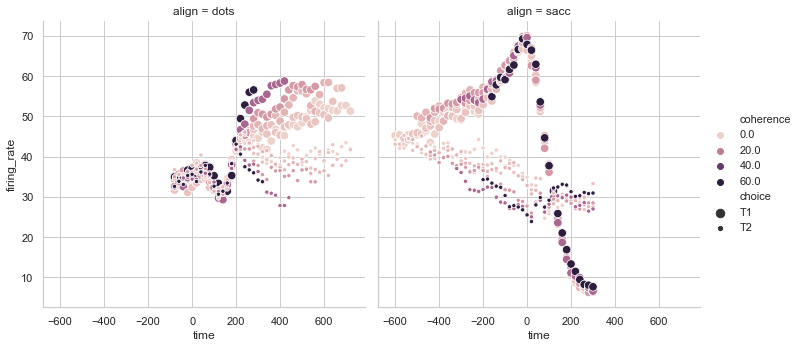

In [56]:
sns.relplot(data=dots, x='time', y='firing_rate', 
            hue='coherence', col='align', size='choice', kind='scatter')

In [58]:
## practice 
tips = sns.load_dataset('tips')
print(tips.shape)
print(tips.info())
print(tips.head())

(244, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB
None
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


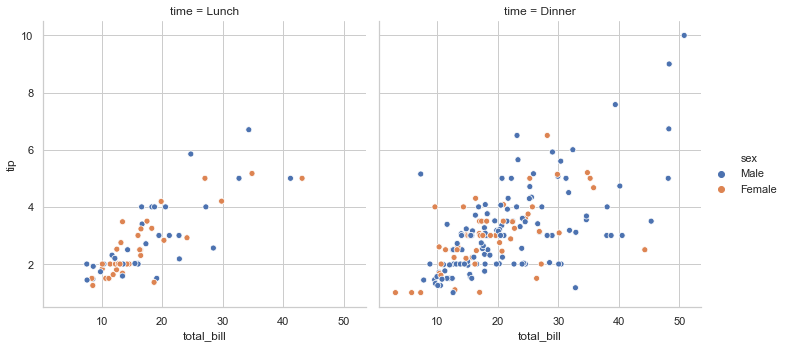

In [65]:
sns.relplot(data=tips, x='total_bill', y='tip', hue='sex', col='time', kind='scatter')

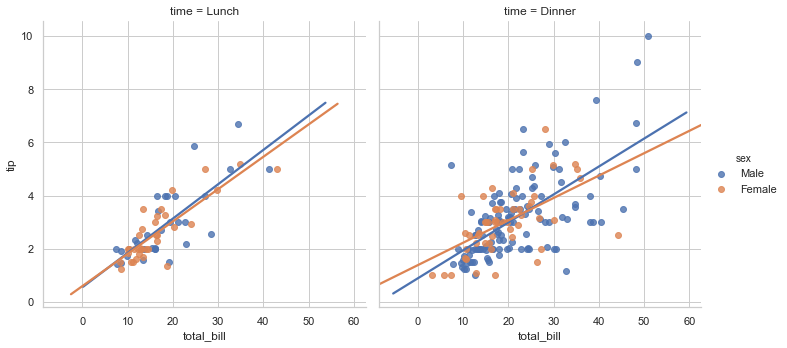

In [72]:
### lmplot으로도 그릴 수 있다. 
sns.lmplot(data=tips, x='total_bill', y='tip', hue='sex', col='time', ci=0)

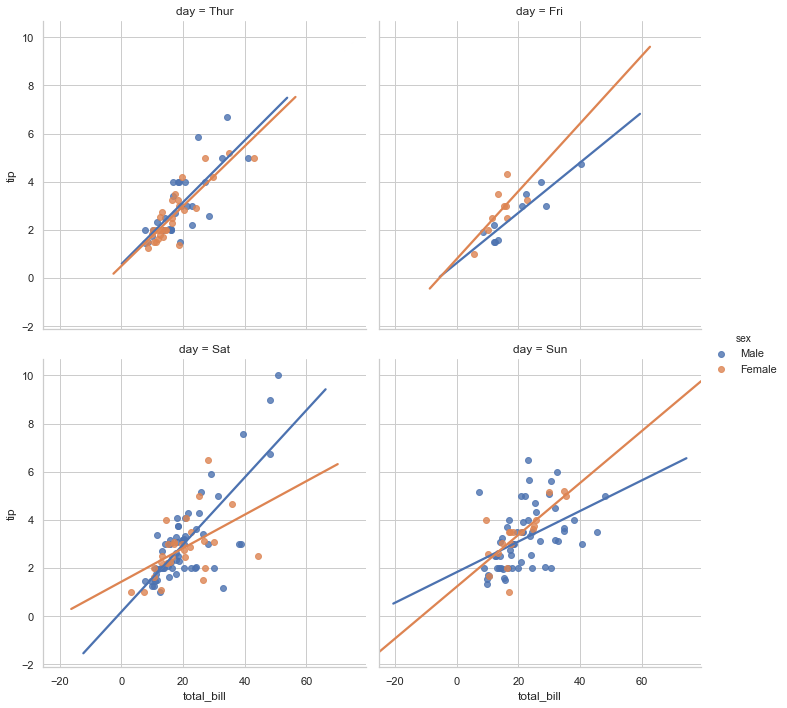

In [74]:
#### cf. col_wrap 옵션으로 한 컬럼에 표시될 subplot 숫자를 지정할 수 있다. 
sns.lmplot(data=tips, x='total_bill', y='tip', hue='sex', col='day', col_wrap=2,ci=0)